<a href="https://colab.research.google.com/github/isKyleangelo/CSST-101/blob/main/Mercado_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Part 1
# Rule: Eligible(x) -> Scholarship(x)
# Fact: Eligible(Ana)

def unify(variable, constant):
    return {variable: constant}

rule = "Eligible(x) -> Scholarship(x)"
fact = "Eligible(Ana)"

substitution = unify("x", "Ana")

print("Rule:", rule)
print("Fact:", fact)
print("Substitution set:", substitution)


Rule: Eligible(x) -> Scholarship(x)
Fact: Eligible(Ana)
Substitution set: {'x': 'Ana'}


**Part 2:**
List what new facts can be derived for Juan and Ana.


---


Answer:
      Juan: None
      Ana: Eligible(Ana), Scoalrship(Ana), FinancialSupport(Ana)


---


Why not eligible:
      - Maria: Did not apply → fails condition
        Carlos: No high grades → fails condition

In [ ]:
# Part 2
# Rules:
# 1. HighGrades(x) ∧ StudentLeader(x) ∧ Applied(x) → Eligible(x)
# 2. Eligible(x) → Scholarship(x)
# 3. Scholarship(x) → FinancialSupport(x)

facts = {
    "Juan": {"HighGrades", "Applied"},
    "Maria": {"HighGrades", "DidNotApply"},
    "Carlos": {"StudentLeader", "NoHighGrades"},
    "Ana": {"HighGrades", "StudentLeader", "Applied"}
}

derived = {name: set() for name in facts}

def forward_chaining():
    for name, f in facts.items():
        # Rule 1
        if {"HighGrades", "StudentLeader", "Applied"} <= f:
            derived[name].add("Eligible")
        # Rule 2
        if "Eligible" in derived[name]:
            derived[name].add("Scholarship")
        # Rule 3
        if "Scholarship" in derived[name]:
            derived[name].add("FinancialSupport")

forward_chaining()

print("Part 2 – Forward Chaining Results:")
for person, new_facts in derived.items():
    print(f"{person}: {', '.join(new_facts) if new_facts else 'No new facts'}")


In [ ]:
# Part 3
# Goals: Scholarship(Maria), FinancialSupport(Ana)

def prove(goal, person):
    if goal == "Scholarship":
        # Needs Eligible(person)
        return "Eligible" in derived[person]
    elif goal == "FinancialSupport":
        # Needs Scholarship(person)
        return "Scholarship" in derived[person]
    elif goal == "Eligible":
        # Needs HighGrades, StudentLeader, Applied
        return {"HighGrades", "StudentLeader", "Applied"} <= facts[person]
    return False

print("Part 3 – Backward Chaining Results:")
print("Scholarship(Maria):", prove("Scholarship", "Maria"))
print("FinancialSupport(Ana):", prove("FinancialSupport", "Ana"))


To prove Scholarship(Maria), we need Eligible(Maria), but she didn’t apply and isn’t a leader → goal fails.
To prove FinancialSupport(Ana), we need Scholarship(Ana), which needs Eligible(Ana); since Ana has high grades, is a leader, and applied, all conditions are met → goal succeeds.

**PART 4:**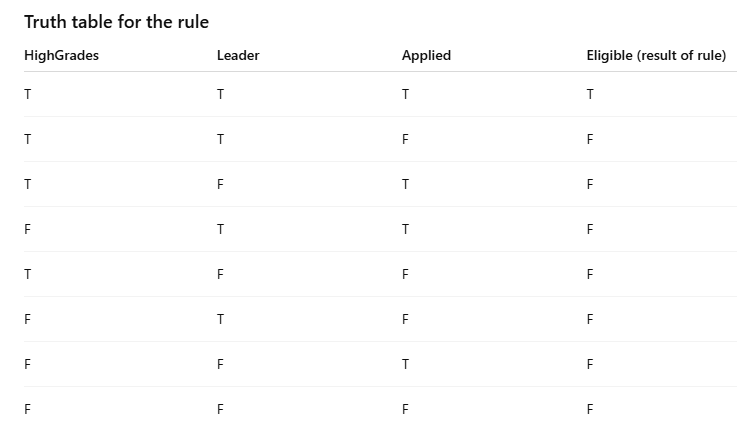

**Part 5: Reflection**

---


Logical reasoning is important in AI because it allows systems to make consistent, step-by-step decisions based on rules and facts, just like humans do. It ensures that conclusions are valid and explainable, which helps build trust in AI outputs. In real life, logical reasoning helps people analyze problems clearly, avoid errors from bias or guesswork, and make fair and sound decisions. Together, these make reasoning a foundation for both intelligent machines and responsible human choices.